In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from comparers import ModelComparer, plot_decision_boundary
from baseline import print_rules
from tasks.gaussian_quantiles import make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

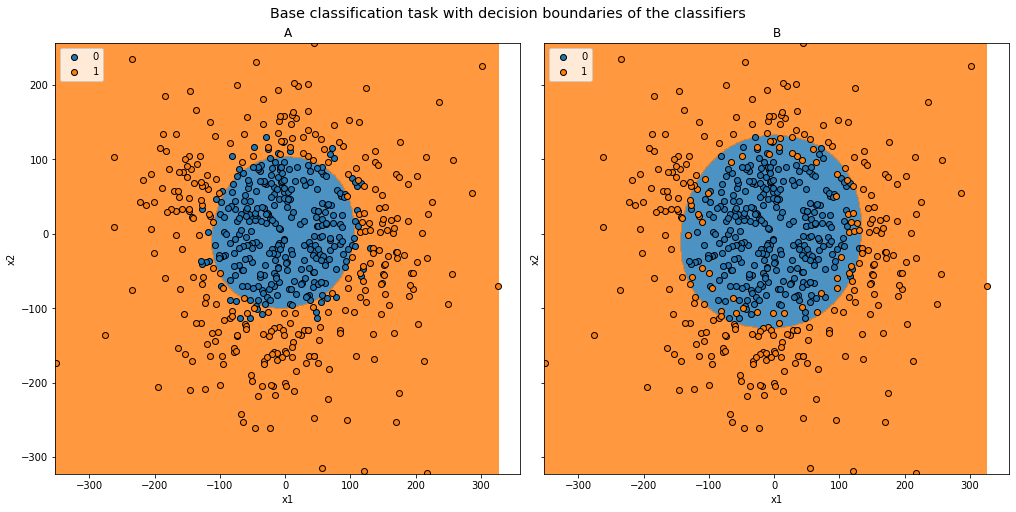

In [16]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label', mesh_step_size=1)

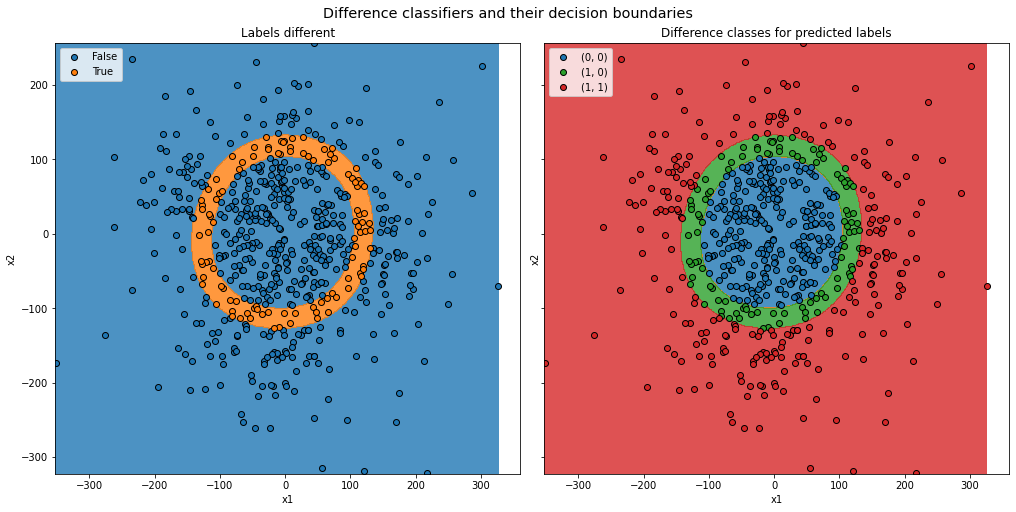

In [18]:
comparer.plot_decision_boundaries(X, mesh_step_size=1)

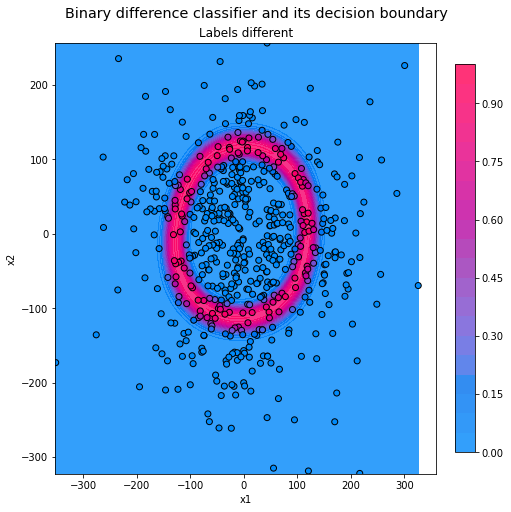

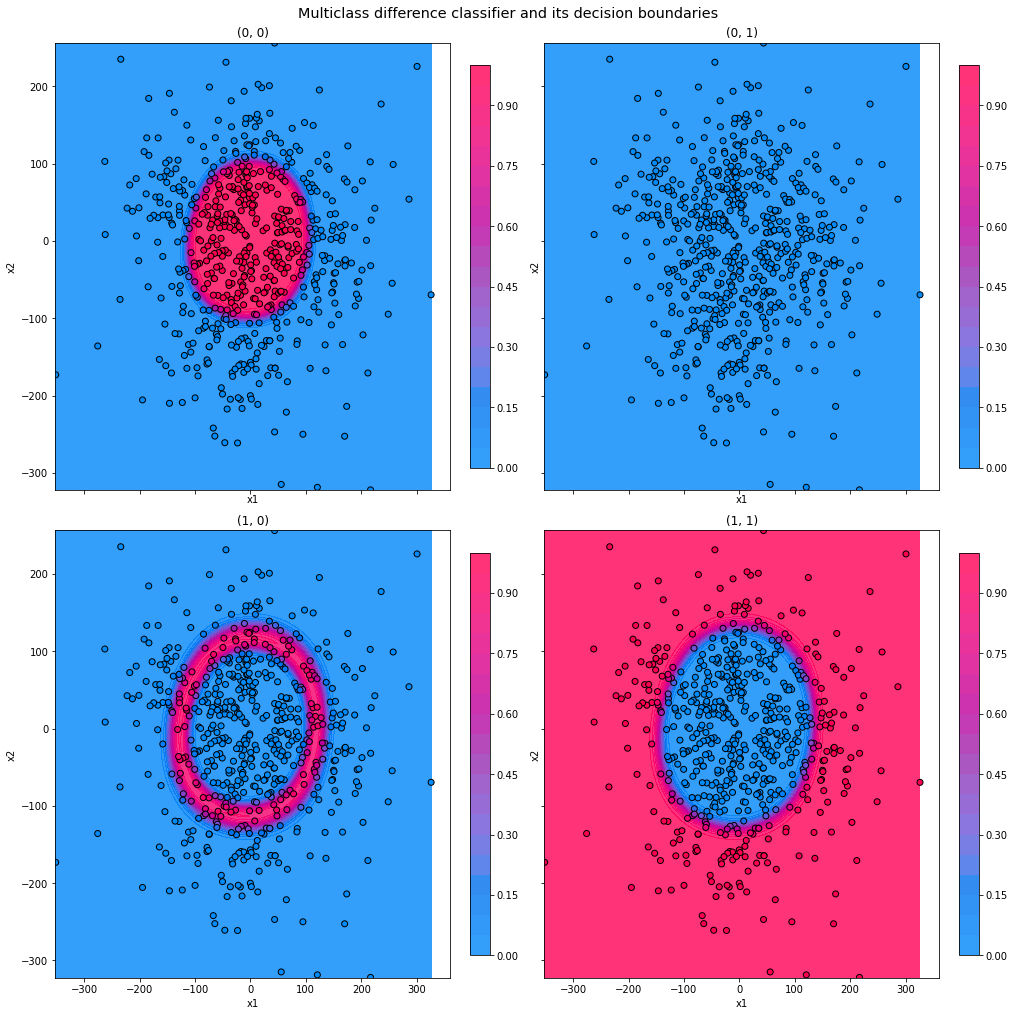

In [19]:
comparer.plot_decision_boundaries(X, kind='proba', mesh_step_size=1)

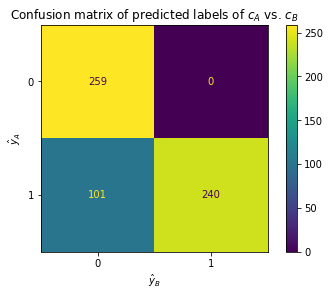

In [20]:
comparer.plot_confusion_matrix(X)

# General Explanations

In [8]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)

In [9]:
mclass_tree = DecisionTreeClassifier()
mclass_tree.fit(X, mclass_diff)
class_names = comparer.class_names[mclass_tree.classes_]

In [10]:
feature_importances = mclass_tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

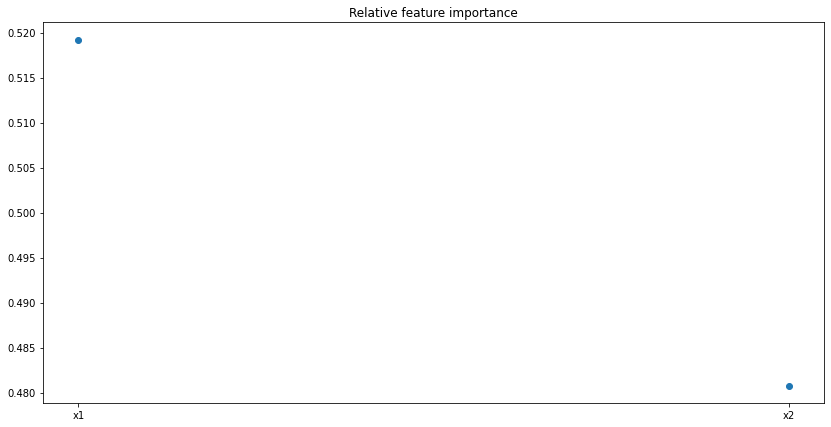

In [11]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

In [12]:
class_names

array(['(0, 0)', '(1, 0)', '(1, 1)'], dtype='<U6')

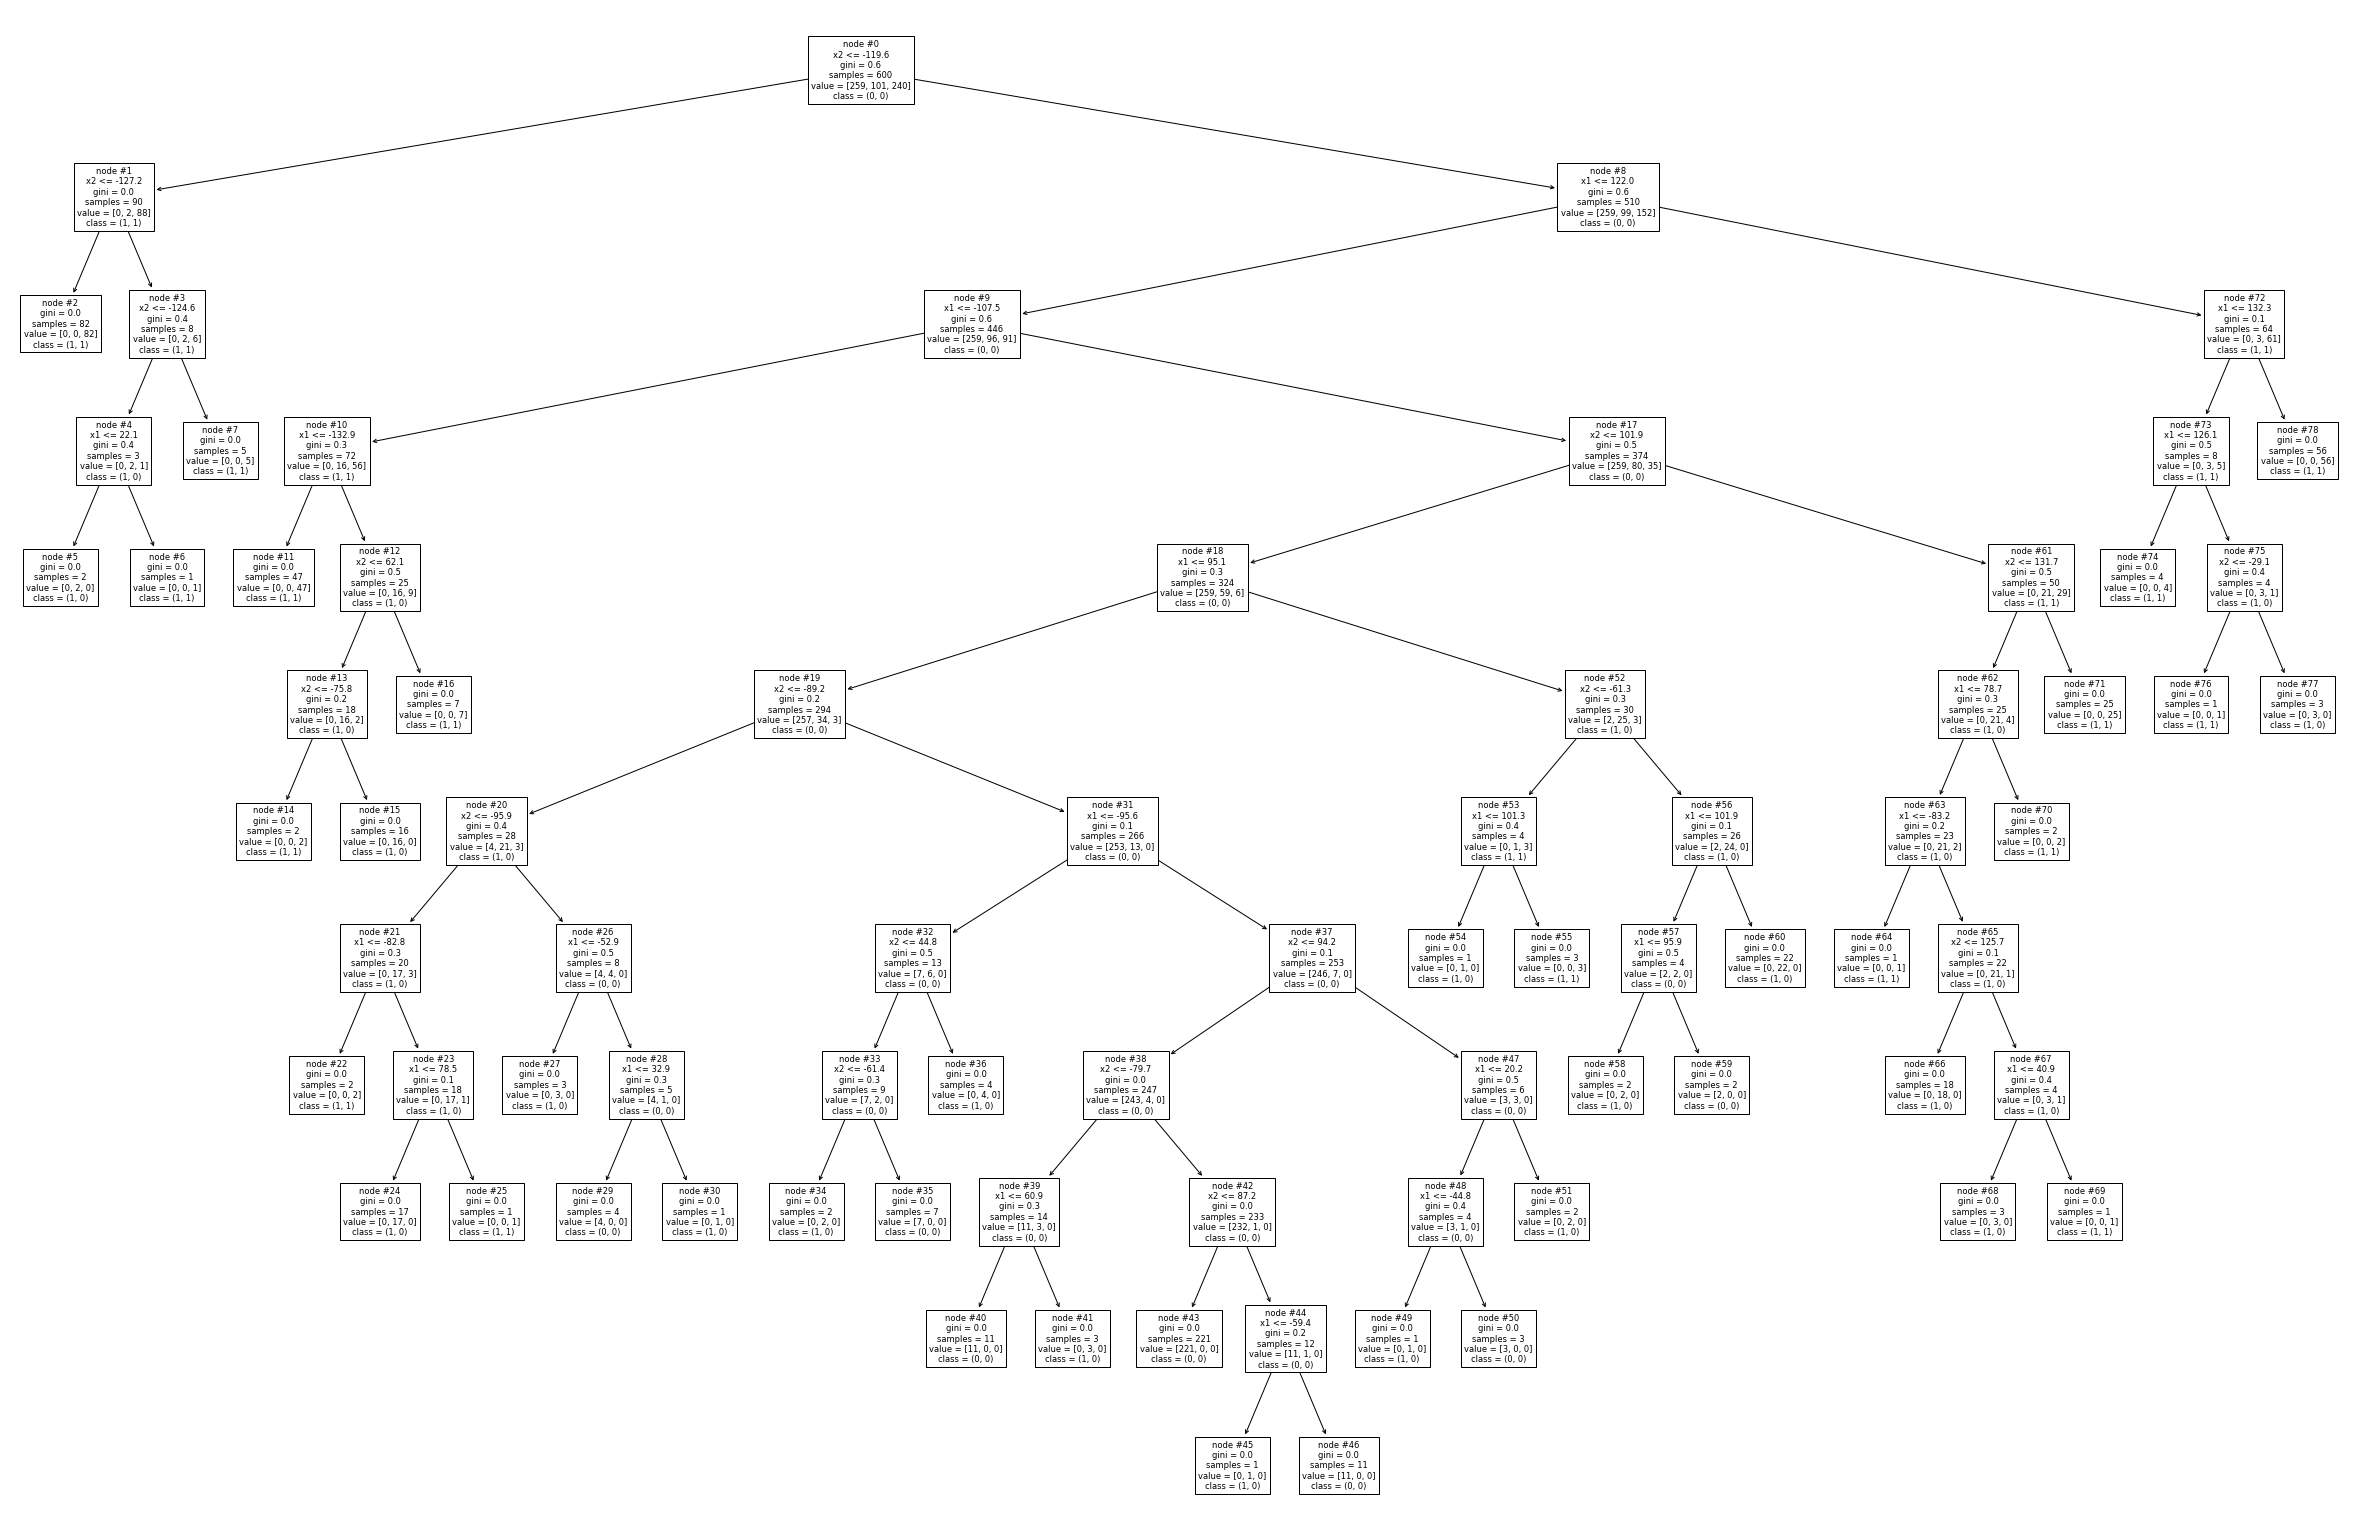

In [13]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(mclass_tree, feature_names=comparer.feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [15]:
print_rules(mclass_tree, feature_names, class_names, '(1, 0)', feature_order, precision=2)

node #60: if (x1 > 101.92) and (x1 <= 121.98) and (x2 > -61.27) and (x2 <= 101.88) then class: (1, 0) (22/22 instances)
node #66: if (x1 > -83.22) and (x1 <= 78.65) and (x2 > 101.88) and (x2 <= 125.71) then class: (1, 0) (18/18 instances)
node #24: if (x1 > -82.84) and (x1 <= 78.52) and (x2 > -119.63) and (x2 <= -95.89) then class: (1, 0) (17/17 instances)
node #15: if (x1 > -132.91) and (x1 <= -107.46) and (x2 > -75.78) and (x2 <= 62.12) then class: (1, 0) (16/16 instances)
node #36: if (x1 > -107.46) and (x1 <= -95.62) and (x2 > 44.82) and (x2 <= 101.88) then class: (1, 0) (4/4 instances)
node #77: if (x1 > 126.05) and (x1 <= 132.29) and (x2 > -29.1) then class: (1, 0) (3/3 instances)
node #27: if (x1 > -107.46) and (x1 <= -52.91) and (x2 > -95.89) and (x2 <= -89.16) then class: (1, 0) (3/3 instances)
node #41: if (x1 > 60.86) and (x1 <= 95.09) and (x2 > -89.16) and (x2 <= -79.73) then class: (1, 0) (3/3 instances)
node #68: if (x1 > -83.22) and (x1 <= 40.92) and (x2 > 125.71) and (x